In [11]:
# package imports and plotting elements
from math import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.style.use('fivethirtyeight')
plt.rcParams['axes.facecolor'] = '#e8e8e8'
plt.rcParams['axes.edgecolor'] = '#e8e8e8'
plt.rcParams['figure.facecolor'] = '#e8e8e8'

In [12]:
# define magnetic field components to forth order
def F_ex(a, b, R, tau, rho):
    term1 = (18*a**4 + 13*b**4)/(1250*R**4)
    term2 = 31*a**2*b**2/(750*R**4)
    term3 = (tau + rho)/R * (1/5 + 2*(a**2-b**2)/(250*R**2))
    term4 = (tau**2+rho**2)/(250*R**2) * (25 + (52*b**2-62*a**2)/(R**2))
    term5 = 8*(tau**3+rho**3)/(25*R**3)
    term6 = 52*(tau**4+rho**4)/(125*R**4)
    
    return -term1 + term2 + term3 - term4 - term5 - term6


def F_1x(a, b, R, tau, rho):
    term1 = (tau-rho)/R * (150 + (24*b**2-44*a**2)/(R**2))
    term2 = 165*(tau**2-rho**2)/(R**2)
    term3 = 96*(tau**3-rho**3)/(R**3)
    
    return term1 + term2 + term3


def F_2x(a, b, R, tau, rho):
    term1 = (31*b**2-36*a**2)/(R**2)
    term2 = 60*(tau+rho)/R
    term3 = 186*(tau**2+rho**2)/(R**2)
    
    return term1 + term2 + term3


def F_3x(R, tau, rho):
    
    return 88*(tau-rho)/R


def F_1y(a, b, R, tau, rho):
    term1 = (rho-tau)/R * (75 + (12*b**2-22*a**2)/(R**2))
    term2 = 165*(rho**2-tau**2)/(2*R**2)
    term3 = 48*(rho**3-tau**3)/(R**3)
    
    return term1 + term2 + term3


def F_2y(a, b, R, tau, rho):
    term1 = 2*(36*a**2-31*b**2)/(R**2)
    term2 = 120*(tau-rho)/R
    term3 = 372*(tau**2+rho**2)/(R**2)
    
    return term1 - term2 - term3


def F_3y(R, tau, rho):
    
    return 66*(tau-rho)/R


def Bx(x, y, N, I, a, b, R, tau, rho):
    u0 = 1.2566370614 # in units of mT*mm/A
    
    prefactor_0 = 8*u0*N*I/(5*sqrt(5)*R)
    term2 = b**2/(60*R**2)
    prefactor_5 = (2*x**2-y**2)/(125*R**2)
    prefactor_6 = (3*x*y**2-2*x**3)/(125*R**3)
    term7 = 18/(125*R**4)*(8*x**4-24*x**2*y**2+3*y**4)
    
    return prefactor_0 * (1 - term2 + F_ex(a, b, R, tau, rho)   \
                          + x/(125*R)*F_1x(a, b, R, tau, rho)   \
                          + prefactor_5*F_2x(a, b, R, tau, rho) \
                          + prefactor_6*F_3x(R, tau, rho) - term7)


def By(x, y, N, I, a, b, R, tau, rho):
    u0 = 1.2566370614 # in units of mT*mm/A
    
    prefactor_0 = 8*u0*N*I/(5*sqrt(5)*R)
    prefactor_3 = y*(4*x**2-y**2)/(125*R**3)
    term4 = x*y/(125*R**4)*(288*x**2-216*y**2)
    
    return prefactor_0 * (y/(125*R)*F_1y(a, b, R, tau, rho)        \
                          + x*y/(125*R**2)*F_2y(a, b, R, tau, rho) \
                          + prefactor_3*F_3y(R, tau, rho) + term4)
    

In [13]:
# coil's effective vertical dimension due to wire insulation
# Note: ONLY valid for even number of vertical windings, N_b.
#       If odd N_b are needed, change code below appropriately
def b_eff(b, t, h, N_b):
    n = N_b/2
    term2 = t/h*(2*n-1)/(n**2)
    
    return b*sqrt(1+term2)

In [14]:
# define form dimensions for wire to be wound around
inner_pole_radius = 94 # mm
form_wall_width   = 5  # mm

R_base = inner_pole_radius + form_wall_width

# define wire turn conditions for ideal case
N_a = 13  # num horizontal windings
N_b = 14  # num vertical windings

rho = 0 # mm
tau = 0 # mm

N = N_a*N_b # total number of winding turns/coil
I = 5       # Amps (max allowed for AWG #20)

# info on AWG #20 square magnet wire (converted to metric)
h = 0.8128 # wire core thickness (mm)
t = 0.0150 # wire insulation thickness (mm)
ohm_per_m = 0.028494094488075 # (ohms/m)

# calculate coil cross-section dimensions
a = N_a*(h + 2*t)           # horizontal dimension
b = b_eff(N_b*h, t, h, N_b) # _effective_ vertical dimension
R_avg   = R_base + b/2      # midpoint of coil radius

# calculate additional characteristics
approx_wire_length_per_coil = (2*pi*R_avg)*N/1E3 # (meters)
ohms_per_coil = ohm_per_m*approx_wire_length_per_coil
watts_per_coil = I**2*ohms_per_coil

print('Coil Dimension [a]     =', a, 'mm')
print('Coil Dimension [b_eff] =', b, 'mm')
print('Coil Dimension [R_avg] =', R_avg, 'mm\n')
print('Coil Wire Length     =', approx_wire_length_per_coil, 'meters')
print('Total Wire Length    =', 2*approx_wire_length_per_coil+R_avg, 'meters')
print('Coil Resistance [R]  =', ohms_per_coil, 'Ohms')
print('Coil Heating [power] =', watts_per_coil, 'Watts')

Coil Dimension [a]     = 10.9564 mm
Coil Dimension [b_eff] = 11.407023127880473 mm
Coil Dimension [R_avg] = 104.70351156394024 mm

Coil Wire Length     = 119.73262491529562 meters
Total Wire Length    = 344.1687613945315 meters
Coil Resistance [R]  = 3.4116727276416765 Ohms
Coil Heating [power] = 85.29181819104191 Watts


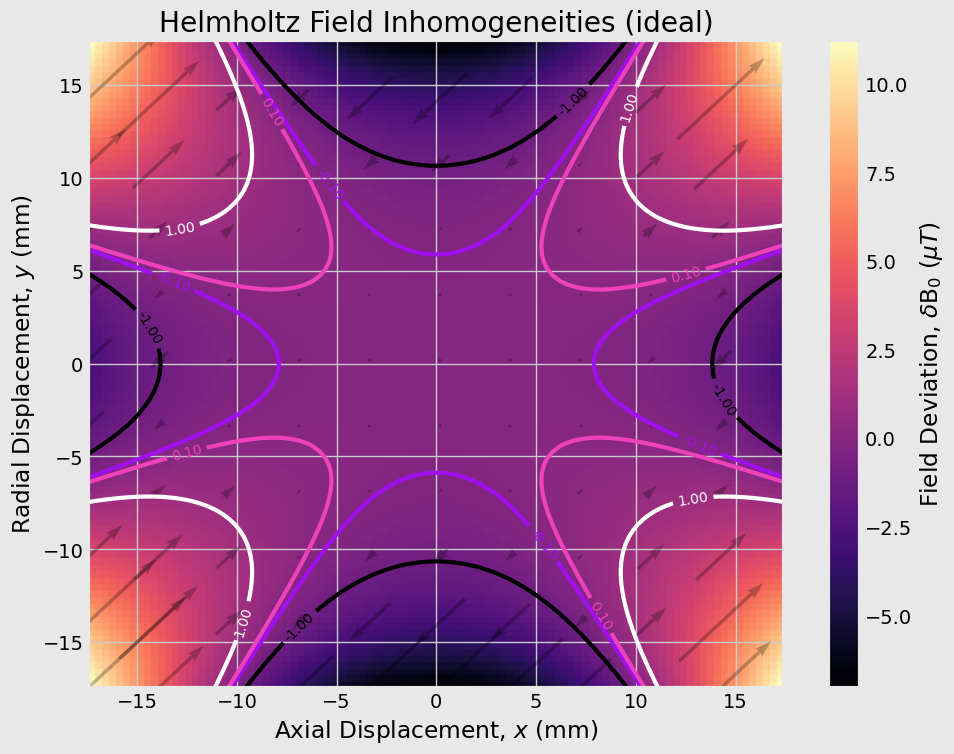

In [17]:
# define the resolution, area of interest, and axes
pts_per_axis = 100
img_span = R_avg/6 # (mm)

x = np.linspace(-img_span, img_span, pts_per_axis, 
                endpoint=True, dtype=np.float64)   # (mm)
y = np.linspace(-img_span, img_span, pts_per_axis, 
                 endpoint=True, dtype=np.float64)  # (mm)

# create empty arrays to store data in
Bx_map = np.empty(shape=[x.size, y.size], dtype=np.float64)
By_map = np.empty(shape=[x.size, y.size], dtype=np.float64)

# iterate over all (x,y) positions to calc. Bx and By using O(4) eqns.
for ix, xval in enumerate(x):
    for iy, yval in enumerate(y):
        Bx_map[ix,iy] = Bx(xval, yval, N, I, a, b, R_avg, tau, rho)
        By_map[ix,iy] = By(xval, yval, N, I, a, b, R_avg, tau, rho)

# make field vector and magnitude maps. calc B(0,0)
B_vector_map = np.arctan2(By_map, Bx_map)*180/np.pi
B_magnitude_map = np.sqrt(np.square(Bx_map) + np.square(By_map))
B_center = (np.sqrt(np.square(Bx(0, 0, N, I, a, b, R_avg, tau, rho)) + 
                    np.square(By(0, 0, N, I, a, b, R_avg, tau, rho))))

# calculate deviation from center field, B(0,0), in micro-Tesla
Z = (B_magnitude_map-B_center)*1E3

# plot central patch of Helmholtz field deviation
fig = plt.figure(figsize=(10,8))
plt.title('Helmholtz Field Inhomogeneities (ideal)')
plt.xlabel('Axial Displacement, $x$ (mm)')
plt.ylabel('Radial Displacement, $y$ (mm)')

axes_range = [x.min(), x.max(), y.min(), y.max()]
plt.imshow(Z, cmap='magma', vmin=Z.min(), vmax=Z.max(), interpolation='none',
           origin='lower', extent=axes_range, aspect='auto')

cbar = plt.colorbar()
cbar.set_label('Field Deviation, $\delta$B$_{0}$ ($\mu T$)')

# add quiver arrows for direction of field divergence
subsample_by = int(pts_per_axis/10)
plt.quiver(x[::subsample_by], y[::subsample_by], Z[::subsample_by, ::subsample_by], 
           Z[::subsample_by, ::subsample_by], angles='xy', units='width', 
           scale_units='xy', pivot='mid', alpha=0.25, width=0.005)

# add contour value overlay
contour_vals = [-1,-0.1,0.1,1]
CP = plt.contour(x, y, Z, contour_vals, linewidths=3, cmap='gnuplot2')
plt.clabel(CP, inline=1, fontsize=10, fmt='%1.2f')

plt.grid(True)
plt.show()

In [16]:
# check center and average field specs, along with deviation over total area
print('B(0,0) =', B_center, 'mT')
print('<Bx> =', np.average(Bx_map), u'\xb1', np.std(Bx_map), 'mT')
print('<By> =', np.average(By_map), u'\xb1', np.std(By_map), 'mT')
print('<B0> =', np.average(B_magnitude_map), u'\xb1', np.std(B_magnitude_map), 'mT')
print('<theta> =', np.average(B_vector_map), u'\xb1', np.std(B_vector_map), 'deg')

B(0,0) = 7.813399236367572 mT
<Bx> = 7.813805753135095 ± 0.0025138612966505527 mT
<By> = 3.4694469519536144e-22 ± 0.001747834052236398 mT
<B0> = 7.813805948599095 ± 0.002513918655678651 mT
<theta> = 1.1102230246251566e-20 ± 0.012815018730885091 deg
